#### Jérémy TREMBLAY

# TP0 : Python Introduction

In [4]:
# Import the library that will be used in this notebook.
import pandas as pd
import numpy as np
import random
import math

# Import the pyplot module from matplotlib with the plt alias.
import matplotlib.pyplot as plt

## Task 6 : Read database

**Consigne :** Récupérez la base de données *opossum*. Ajoutez-la dans un dossier `datasets` relatif à ce TP.  
À l’aide la librairie `pandas`, lire cette base de données (voir méthode d’ouverture d’un fichier relative à son extension), puis affichez quelques valeurs de cette base à l’aide de la méthode `head`.

In [5]:
# Specify the relative path of the opossum file.
file_path = 'datasets/opossum.csv'

# Load the database into a DataFrame.
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame with head.
print(df.head())

  sex  age  hdlngth  skullw  totlngth  taill  footlgth  earconch   eye  chest  \
0   m  1.0     85.9    52.4      80.5   35.0      62.0      42.4  14.1   25.5   
1   m  1.0     86.7    52.6      84.0   38.0      62.3      44.8  15.0   23.5   
2   m  1.0     85.8    50.0      81.0   36.5      62.8      43.0  14.8   22.0   
3   m  1.0     86.5    51.0      81.0   36.5      63.0      44.3  13.2   23.0   
4   m  1.0     88.6    54.7      82.5   39.0      64.4      48.0  14.0   25.0   

   belly  
0   30.0  
1   30.5  
2   28.5  
3   28.0  
4   33.0  


## Task 7 : Use Panda's features

**Consigne :** Il est possible d’accéder aux valeurs des lignes et colonnes de différentes manières en traitant notre
« dataframe ». Familiarisez-vous avec les commandes.

In [7]:
# Display number of rows in the dataframe.
print(len(df.index))

82


In [8]:
# Display the columns.
print(df.columns)

Index(['sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth',
       'earconch', 'eye', 'chest', 'belly'],
      dtype='object')


In [9]:
# Returns a panda's serie.
print(df["age"])

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
77    8.0
78    9.0
79    9.0
80    NaN
81    NaN
Name: age, Length: 82, dtype: float64


In [10]:
# Display the values of each row of the age column of this serie.
df["age"].values

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,
        9.,  9., nan, nan])

In [12]:
# Display the first row.
print(df.iloc[0])

sex            m
age          1.0
hdlngth     85.9
skullw      52.4
totlngth    80.5
taill       35.0
footlgth    62.0
earconch    42.4
eye         14.1
chest       25.5
belly       30.0
Name: 0, dtype: object


In [14]:
# Display the sex for each row.
print(df.iloc[:, 0])

0     m
1     m
2     m
3     m
4     m
     ..
77    m
78    f
79    f
80    m
81    m
Name: sex, Length: 82, dtype: object


In [15]:
# Indicates if there is at least one column with a null value.
print(df.isnull().any())

sex         False
age          True
hdlngth     False
skullw      False
totlngth    False
taill       False
footlgth     True
earconch    False
eye         False
chest       False
belly       False
dtype: bool


In [18]:
# Delete the rows with missing values.
df = df.dropna(subset=['age'])

# Now the dataset only contains 80 rows (2 were null).
print(len(df.index))

80


## Task 8 : Delete the lines with missing values

**Consigne :** Supprimez les lignes avec des valeurs manquantes pour vous assurer que le dataframe est propre.  
Afficher ensuite la matrice de correlation des colonnes entre-elles à l’aide de la méthode `corr`.

### Clean the dataframe

First we need to load again the dataset to get a new and clean data frame.

In [21]:
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame with head.
print(len(df.index))

82


There is 82 rows, let check the columns that contains null values:

In [23]:
print(df.isnull().any())

sex         False
age          True
hdlngth     False
skullw      False
totlngth    False
taill       False
footlgth     True
earconch    False
eye         False
chest       False
belly       False
dtype: bool


We need to clean the columns footlength and age.

In [24]:
# Delete the rows with missing values.
df = df.dropna(subset=['age'])
df = df.dropna(subset=['footlgth'])

Let now check the number of rows of this dataframe:

In [25]:
print(len(df.index))

79


3 rows were removed. Let now check that everything is clean:

In [26]:
print(df.isnull().any())

sex         False
age         False
hdlngth     False
skullw      False
totlngth    False
taill       False
footlgth    False
earconch    False
eye         False
chest       False
belly       False
dtype: bool


Perfect.
Note: It is also possible to remove all the missing rows whatever the columns touched by missing values.

In [28]:
df = pd.read_csv(file_path) # Load the dataframe again

print(len(df.index)) # 82

# Remove all incomplete rows.
df.dropna(inplace=True)

print(len(df.index)) # 79

82
79


 ### Display correlation matrix

In [30]:
# Get the correlation matrix.
corr_matrix = df.corr()

# Display the correlation matrix numerically.
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
               age   hdlngth    skullw  totlngth     taill  footlgth  \
age       1.000000  0.434319  0.349908  0.326974  0.107362  0.162146   
hdlngth   0.434319  1.000000  0.655521  0.599842  0.079489  0.352002   
skullw    0.349908  0.655521  1.000000  0.420161  0.056414  0.248005   
totlngth  0.326974  0.599842  0.420161  1.000000  0.487067  0.460960   
taill     0.107362  0.079489  0.056414  0.487067  1.000000 -0.229061   
footlgth  0.162146  0.352002  0.248005  0.460960 -0.229061  1.000000   
earconch  0.112547  0.288993  0.151263  0.339191 -0.329926  0.899060   
eye       0.198595  0.351383  0.270535  0.226744  0.107057 -0.000398   
chest     0.373069  0.591205  0.557144  0.500999 -0.020560  0.512088   
belly     0.384682  0.509035  0.407957  0.419246  0.143754  0.286707   

          earconch       eye     chest     belly  
age       0.112547  0.198595  0.373069  0.384682  
hdlngth   0.288993  0.351383  0.591205  0.509035  
skullw    0.151263  0.270535  0.55

/run/user/1000/ipykernel_6110/1510436604.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Let's visually see this correlation matrix

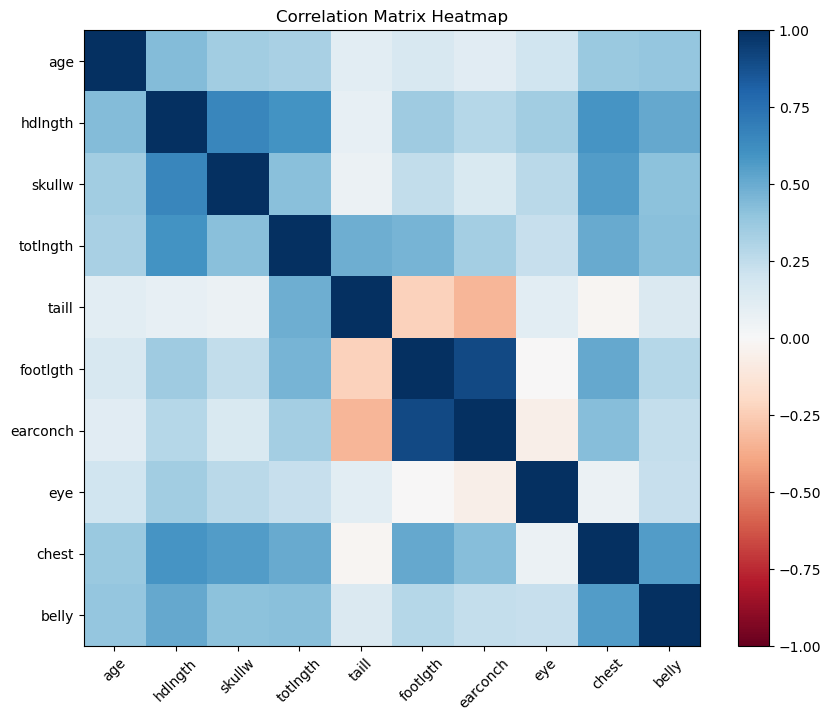

In [31]:
# Create a heatmap of the correlation matrix.
plt.figure(figsize=(10, 8))
im = plt.imshow(corr_matrix, cmap=plt.cm.RdBu, vmin=-1, vmax=1)
plt.colorbar(im)

pticks = np.arange(len(corr_matrix.columns))
plt.xticks(ticks=pticks, labels=corr_matrix.columns, rotation=45)
plt.yticks(ticks=pticks, labels=corr_matrix.columns)

# Display the matrix.
plt.title("Correlation Matrix Heatmap")
plt.show()

## Task 9: Identify 5 descriptors linked with the width of the skull of an opossum.

**Consigne :** À partir de cette matrice de corrélation, identifiez 5 descripteurs qui semblent être intéressants pour
donner des indications sur la largeur du crâne d’un opossum (`skullw`).

From the correlation matrix, if we closely look on the `skullw` line (or column), we can see that the blue squares indicate a strong correlation on each of the other criterions (look on the intersection and check the line or column corresponding). For example, we can see the darkest blue corresponds at the width of the skull (logic, a criterion, is correlated with itself). This is not a relevant information.
However, if we look on the other blue squares, we can see that the darkest square corresponds with the head length. So the skull width seems to be correlated with the head length (this seems logical). Then, from the darkes to the lighest bleu, we have: the chest, the belly, the tooth length and the age. The other criterions seems also have a small correlation.  

So, if we have to remember only 5 criterions to determine the width of a skull, it would be these (from the most correlated to the least correlated):
1. The head length (`hdlngth`)
2. The chest (`chest`)
3. The belly (`belly`)
4. The tooth length (`totlngth`)
5. The age (`age`)